## problem statement




A financial institution seeks to enhance visibility into its loan portfolio by developing a dynamic reporting solution that monitors loan performance based on Loan Status. The current lack of granular, real-time insights into key lending metrics limits the ability to make informed decisions and optimize operations.
The objective is to build an interactive grid view report that categorizes loan data by status (e.g., current, late, charged off) and delivers actionable insights into critical performance metrics, including:

Total Loan Applications

Total Funded Amount

Total Amount Received

Month-to-Date (MTD) Funded Amount

MTD Amount Received

Average Interest Rate

Average Debt-to-Income (DTI) Ratio

This solution will empower stakeholders to identify trends, detect risk early, and make data-driven decisions to improve lending efficiency, reduce default rates, and increase overall portfolio health.



## data collecting

In [126]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime
plt.style.use("seaborn-v0_8")
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [127]:
df = pd.read_csv("financial_loan.csv")
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,"30,000.00",0.01,59.83,0.15,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,"48,000.00",0.05,109.43,0.19,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,"50,000.00",0.21,421.65,0.16,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,"42,000.00",0.05,97.06,0.11,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,"83,000.00",0.02,106.53,0.06,3500,28,3835


## data understanding


In [128]:
df.columns.to_list()

['id',
 'address_state',
 'application_type',
 'emp_length',
 'emp_title',
 'grade',
 'home_ownership',
 'issue_date',
 'last_credit_pull_date',
 'last_payment_date',
 'loan_status',
 'next_payment_date',
 'member_id',
 'purpose',
 'sub_grade',
 'term',
 'verification_status',
 'annual_income',
 'dti',
 'installment',
 'int_rate',
 'loan_amount',
 'total_acc',
 'total_payment']

In [129]:
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,"38,576.00","38,576.00","38,576.00","38,576.00","38,576.00","38,576.00","38,576.00","38,576.00","38,576.00"
mean,"681,037.06","847,651.51","69,644.54",0.13,326.86,0.12,"11,296.07",22.13,"12,263.35"
std,"211,324.58","266,810.46","64,293.68",0.07,209.09,0.04,"7,460.75",11.39,"9,051.10"
min,"54,734.00","70,699.00","4,000.00",0.00,15.69,0.05,500.00,2.00,34.00
25%,"513,517.00","662,978.75","41,500.00",0.08,168.45,0.09,"5,500.00",14.00,"5,633.00"
50%,"662,728.00","847,356.50","60,000.00",0.13,283.05,0.12,"10,000.00",20.00,"10,042.00"
75%,"836,506.00","1,045,652.50","83,200.50",0.19,434.44,0.15,"15,000.00",29.00,"16,658.00"
max,"1,077,501.00","1,314,167.00","6,000,000.00",0.30,"1,305.19",0.25,"35,000.00",90.00,"58,564.00"


In [130]:
df.dtypes

id                         int64
address_state             object
application_type          object
emp_length                object
emp_title                 object
grade                     object
home_ownership            object
issue_date                object
last_credit_pull_date     object
last_payment_date         object
loan_status               object
next_payment_date         object
member_id                  int64
purpose                   object
sub_grade                 object
term                      object
verification_status       object
annual_income            float64
dti                      float64
installment              float64
int_rate                 float64
loan_amount                int64
total_acc                  int64
total_payment              int64
dtype: object

In [131]:
df.shape

(38576, 24)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

### observation:
- there is 24 columns
- there is 38576 rows 
- there is some null values to work on

## grouping by data types

In [133]:
continues = ['annual_income','dti','installment','int_rate','loan_amount','total_payment']

d_count = ['id','member_id','total_acc']

d_cat = ['address_state','application_type','emp_length','emp_title','grade','home_ownership','issue_date','last_credit_pull_date','last_payment_date','loan_status','next_payment_date','purpose','sub_grade','term','verification_status']



### observation:
- we have 6 continues variables
- we have 3 discrete count variable
- we have 15 discrete catagorical variables

## understanding every columns


## for discrete variables

In [134]:
for i in d_cat:
    print("\n",i,' the unique values are:' ,df[i].unique())
    print(i,'the value count are:',df[i].value_counts())


 address_state  the unique values are: ['GA' 'CA' 'TX' 'IL' 'PA' 'FL' 'MI' 'RI' 'NY' 'MD' 'WI' 'NV' 'UT' 'WA'
 'NH' 'HI' 'MA' 'OK' 'NJ' 'OH' 'AZ' 'CT' 'MN' 'CO' 'TN' 'VA' 'MO' 'DE'
 'NM' 'LA' 'AR' 'KY' 'NC' 'SC' 'WV' 'KS' 'WY' 'OR' 'AL' 'VT' 'MS' 'DC'
 'MT' 'SD' 'AK' 'IN' 'ME' 'ID' 'NE' 'IA']
address_state the value count are: address_state
CA    6894
NY    3701
FL    2773
TX    2664
NJ    1822
IL    1486
PA    1482
VA    1375
GA    1355
MA    1310
OH    1188
MD    1027
AZ     833
WA     805
CO     770
NC     759
CT     730
MI     685
MO     660
MN     592
NV     482
SC     464
WI     446
OR     436
AL     432
LA     426
KY     320
OK     293
KS     260
UT     252
AR     236
DC     214
RI     196
NM     183
HI     170
WV     167
NH     161
DE     110
MT      79
WY      79
AK      78
SD      63
VT      54
MS      19
TN      17
IN       9
ID       6
NE       5
IA       5
ME       3
Name: count, dtype: int64

 application_type  the unique values are: ['INDIVIDUAL']
application_type the v

In [135]:
d_cat

['address_state',
 'application_type',
 'emp_length',
 'emp_title',
 'grade',
 'home_ownership',
 'issue_date',
 'last_credit_pull_date',
 'last_payment_date',
 'loan_status',
 'next_payment_date',
 'purpose',
 'sub_grade',
 'term',
 'verification_status']

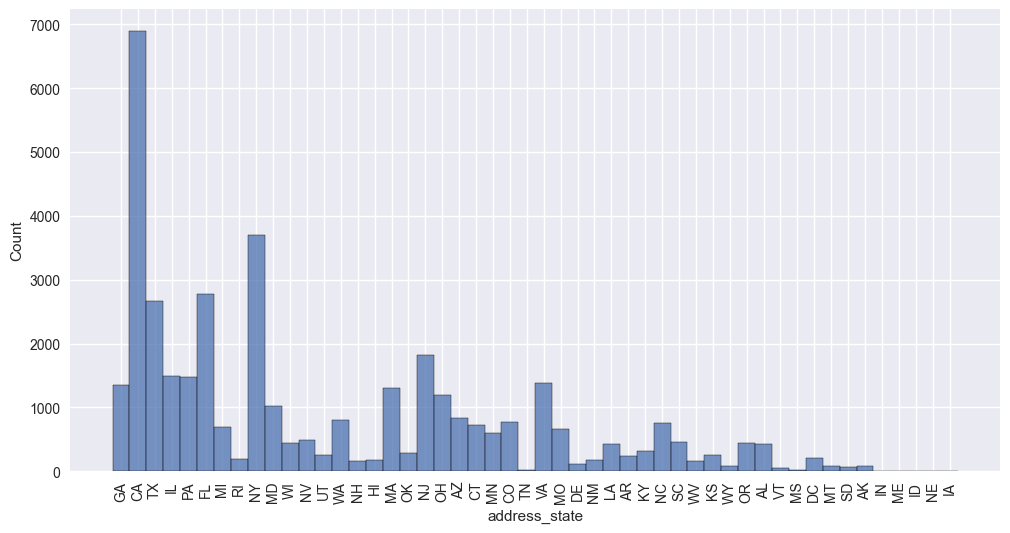

In [136]:
plt.figure(figsize=(12, 6))
sns.histplot(df["address_state"])
plt.xticks(rotation=90)
plt.show()

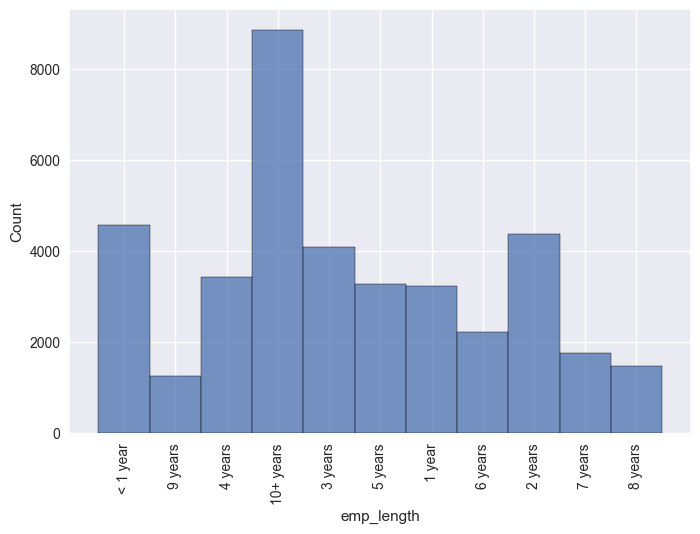

In [137]:
sns.histplot(df["emp_length"])
plt.xticks(rotation=90)
plt.show()

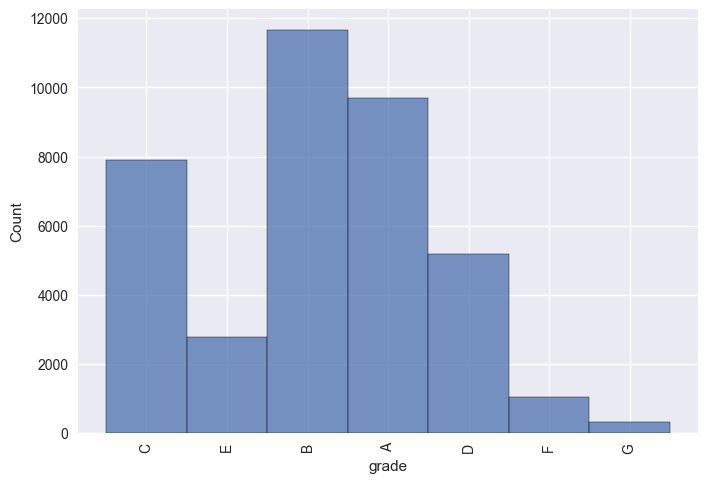

In [138]:
sns.histplot(df["grade"])
plt.xticks(rotation=90)
plt.show()

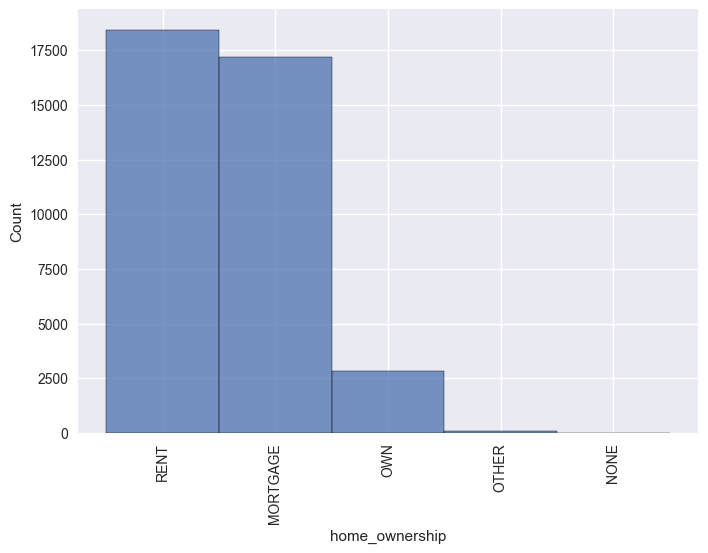

In [139]:
sns.histplot(df["home_ownership"])
plt.xticks(rotation=90)
plt.show()

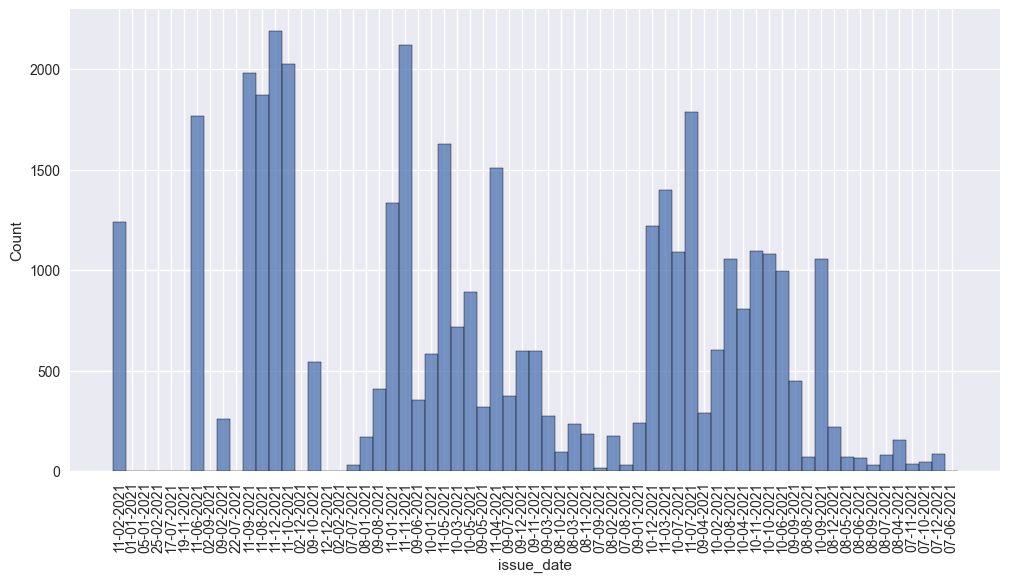

In [140]:
plt.figure(figsize=(12, 6))
sns.histplot(df["issue_date"])
plt.xticks(rotation=90)
plt.show()

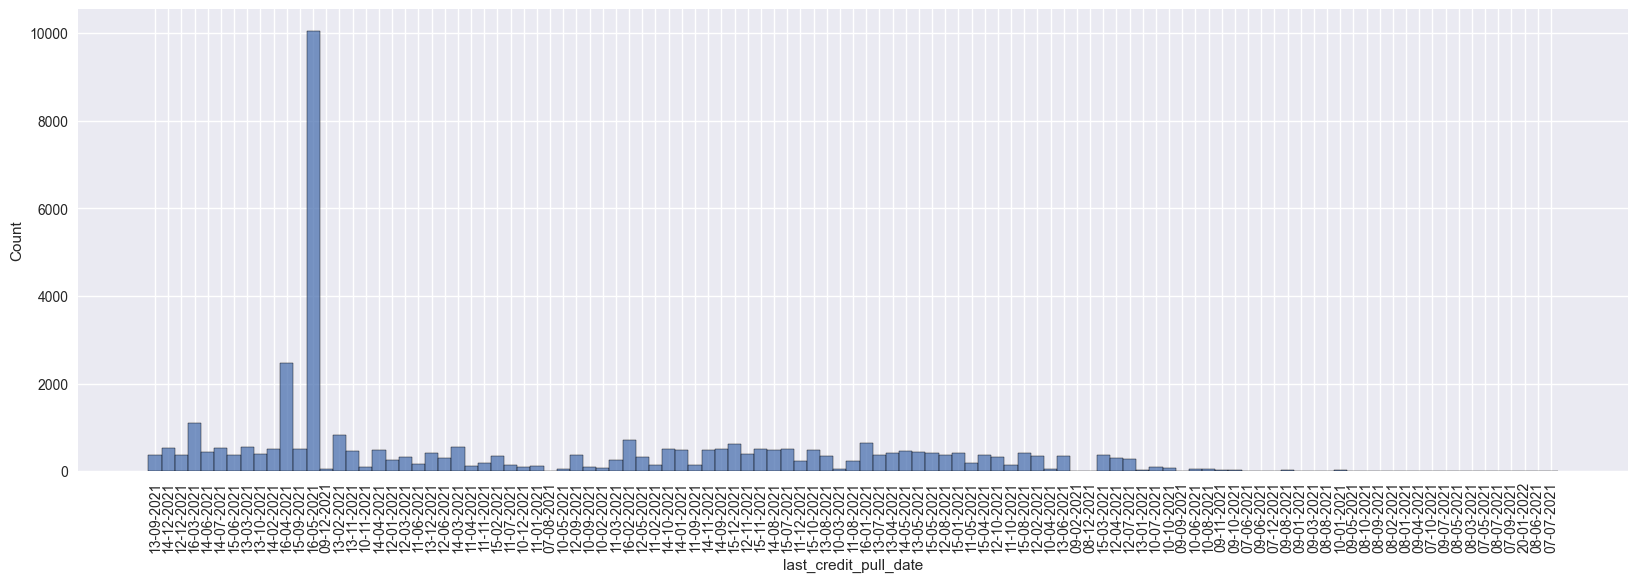

In [141]:
plt.figure(figsize=(20,6))
sns.histplot(df["last_credit_pull_date"])
plt.xticks(rotation=90)
plt.show()

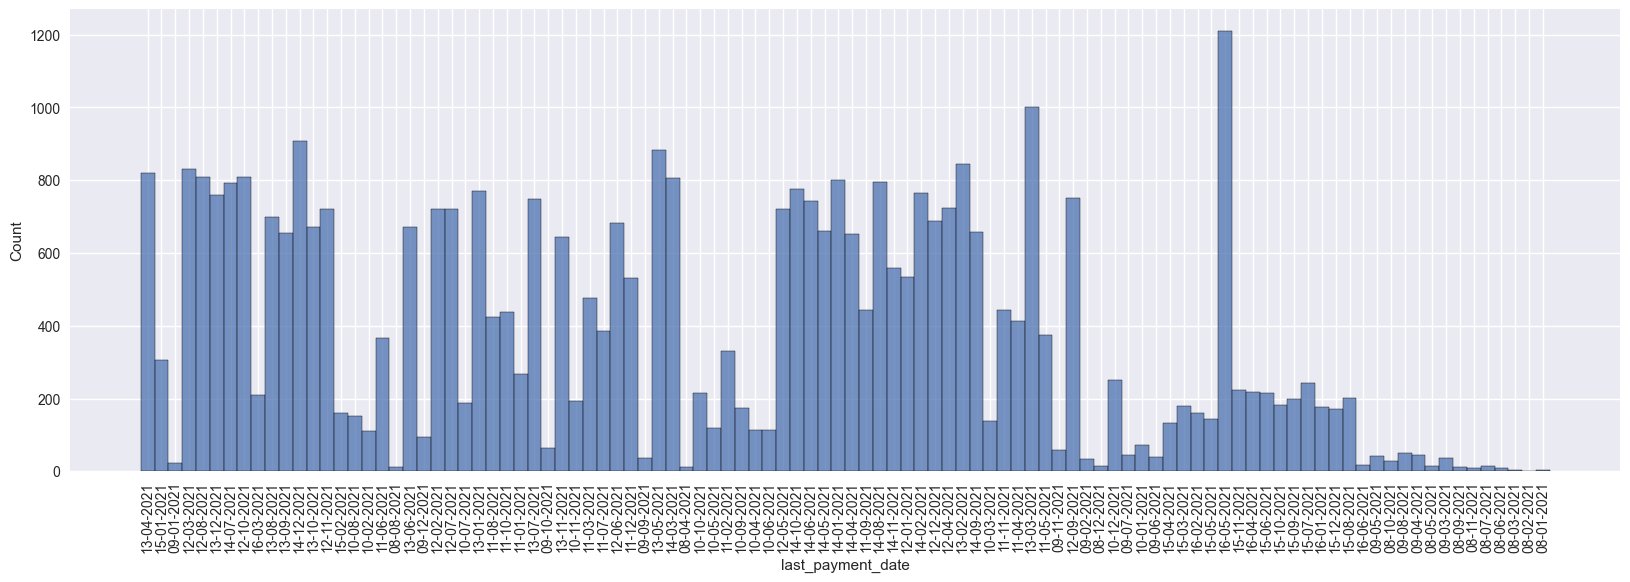

In [142]:
plt.figure(figsize=(20,6))
sns.histplot(df["last_payment_date"])
plt.xticks(rotation=90)
plt.show()

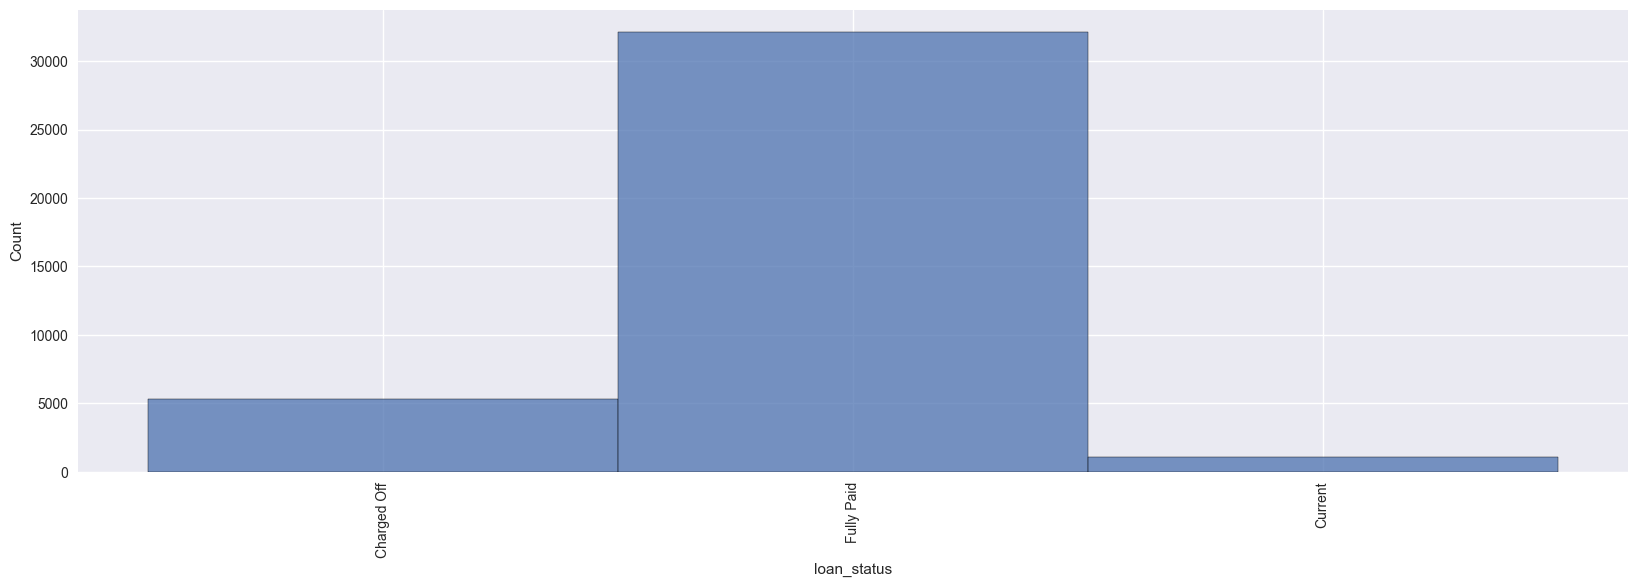

In [143]:
plt.figure(figsize=(20,6))
sns.histplot(df["loan_status"])
plt.xticks(rotation=90)
plt.show()

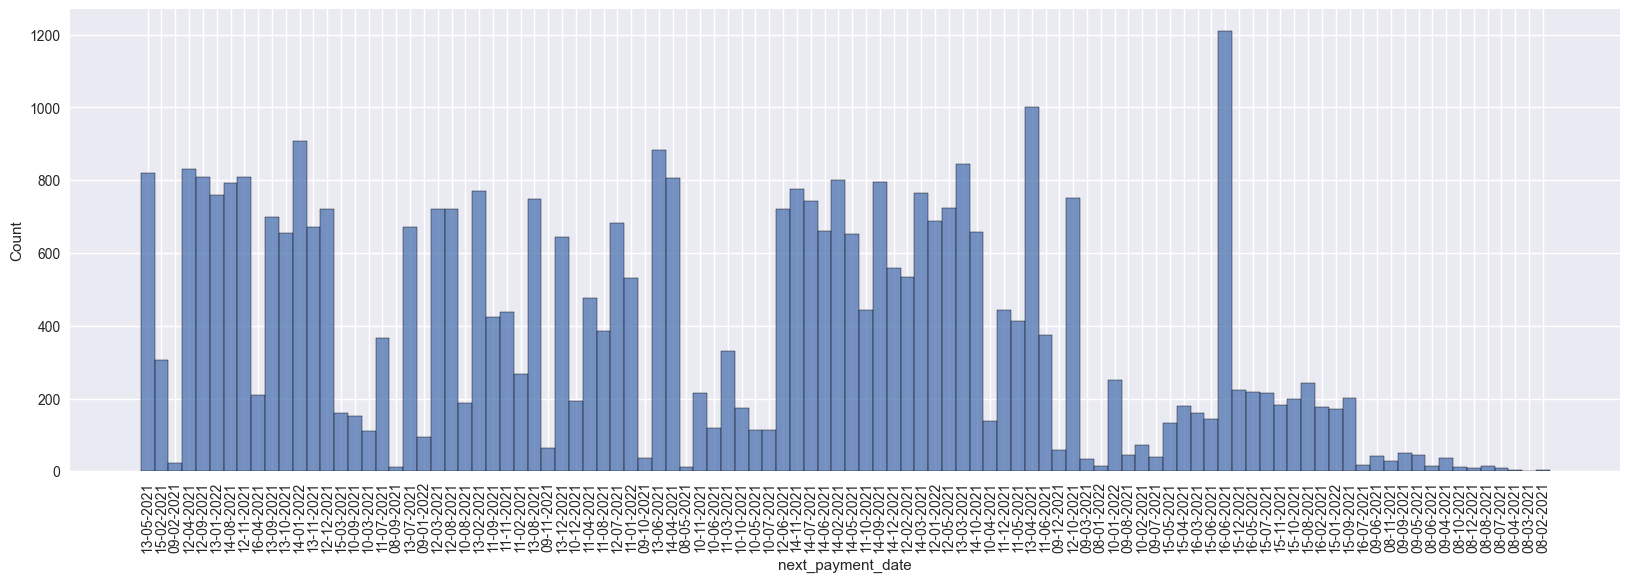

In [144]:
plt.figure(figsize=(20,6))
sns.histplot(df["next_payment_date"])
plt.xticks(rotation=90)
plt.show()

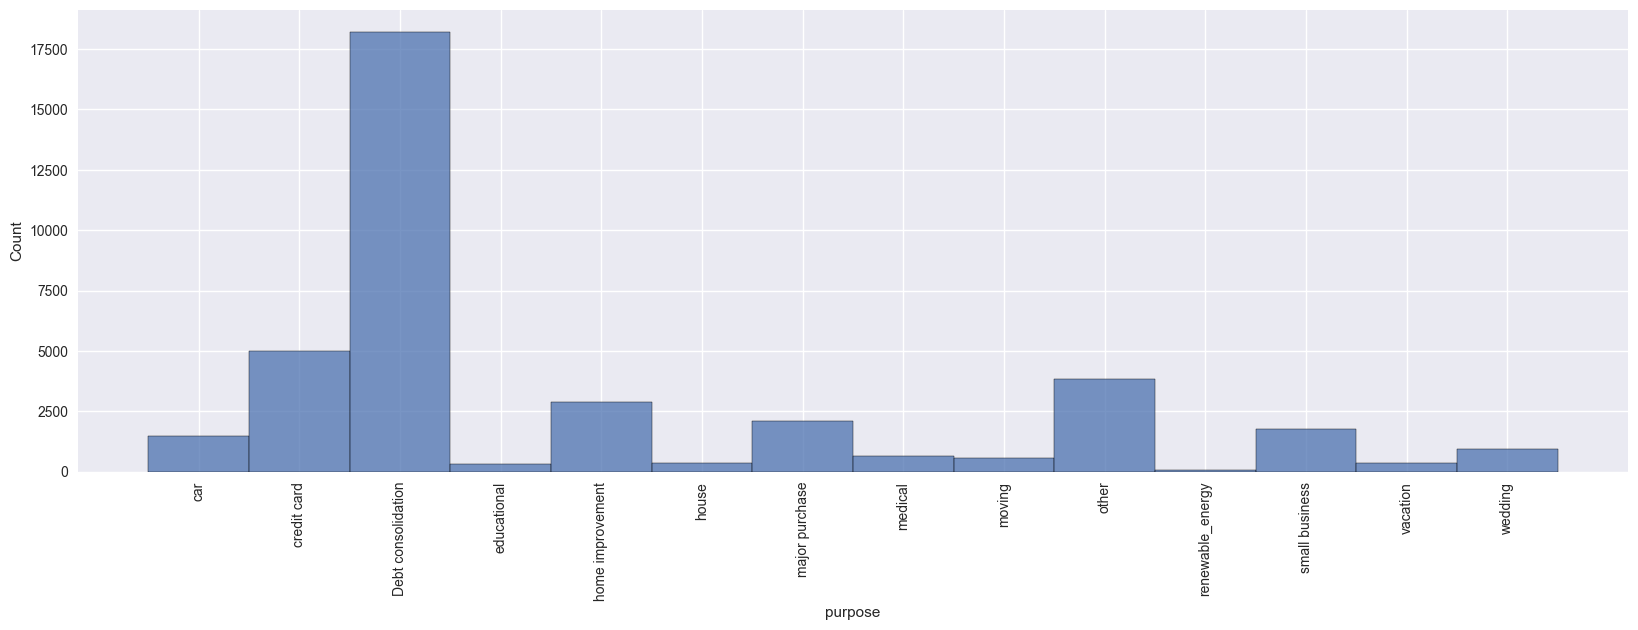

In [145]:
plt.figure(figsize=(20,6))
sns.histplot(df["purpose"])
plt.xticks(rotation=90)
plt.show()

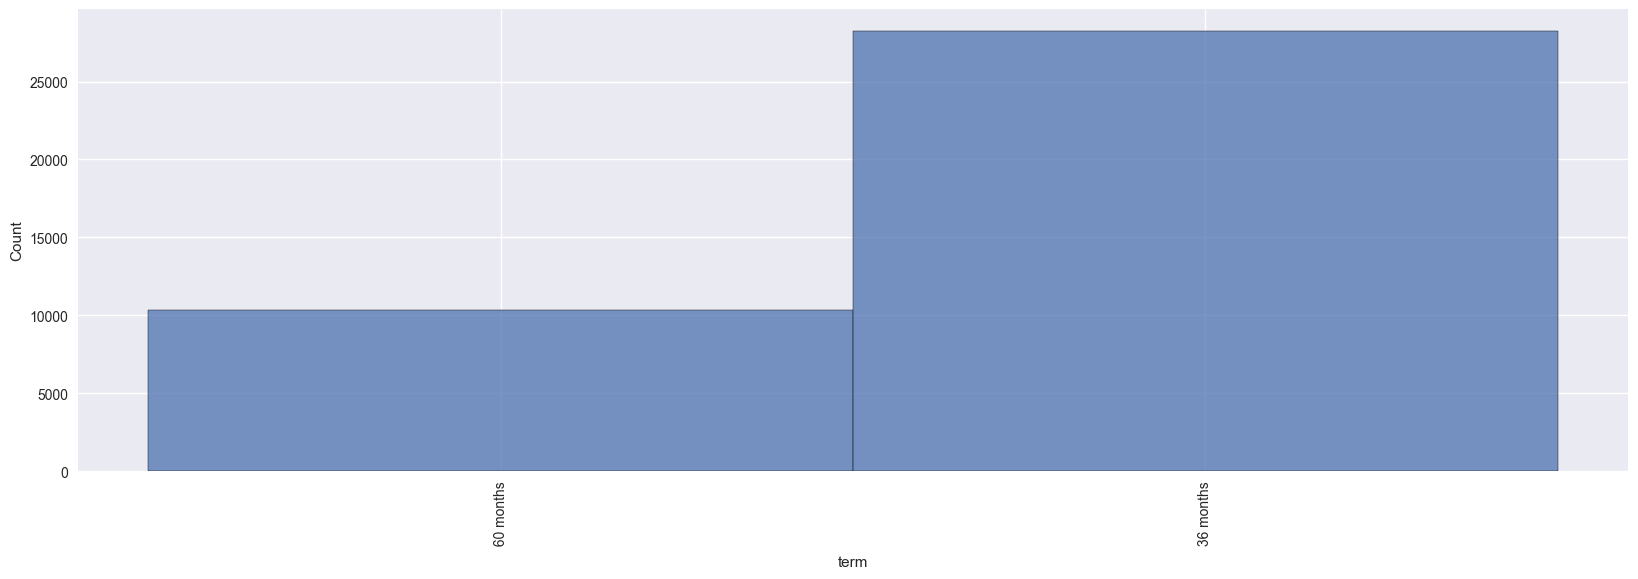

In [146]:
plt.figure(figsize=(20,6))
sns.histplot(df["term"])
plt.xticks(rotation=90)
plt.show()

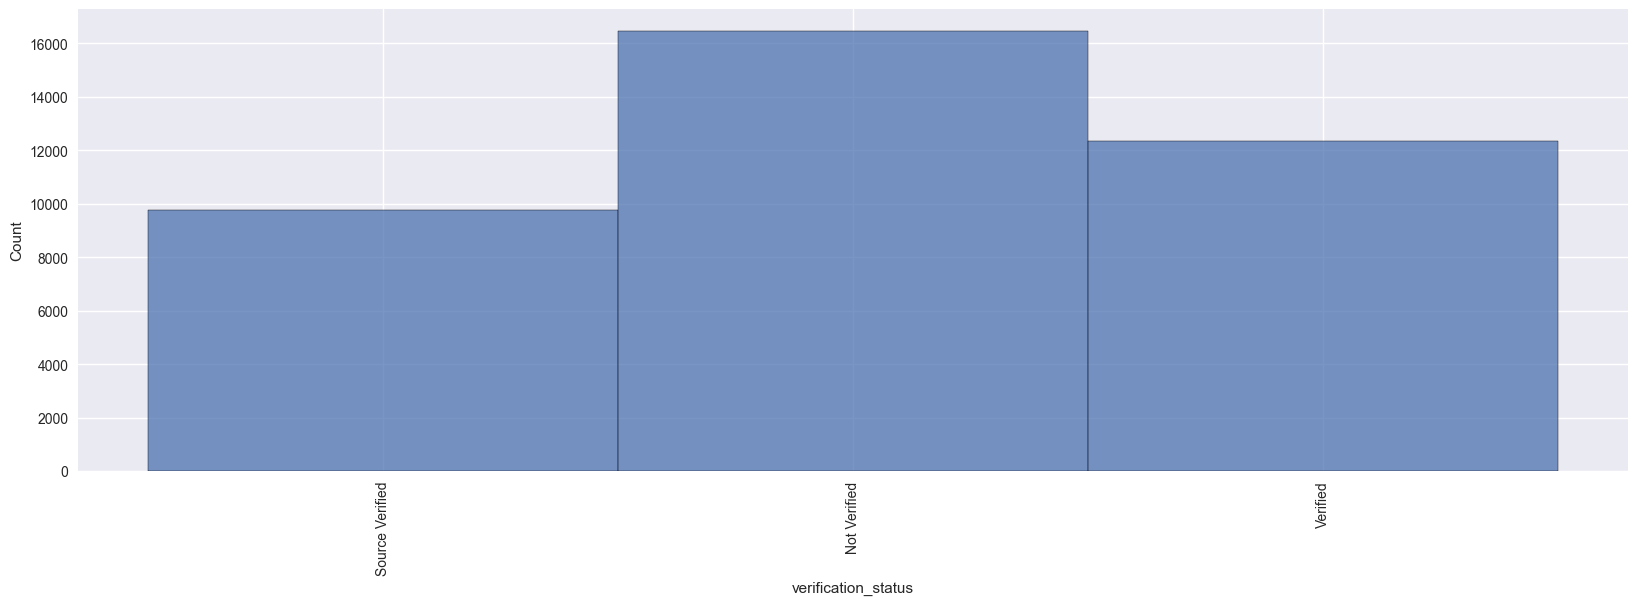

In [147]:
plt.figure(figsize=(20,6))
sns.histplot(df["verification_status"])
plt.xticks(rotation=90)
plt.show()

## for continoues variables

In [148]:
df[continues].describe()

,annual_income,dti,installment,int_rate,loan_amount,total_payment
count,"38,576.00","38,576.00","38,576.00","38,576.00","38,576.00","38,576.00"
mean,"69,644.54",0.13,326.86,0.12,"11,296.07","12,263.35"
std,"64,293.68",0.07,209.09,0.04,"7,460.75","9,051.10"
min,"4,000.00",0.00,15.69,0.05,500.00,34.00
25%,"41,500.00",0.08,168.45,0.09,"5,500.00","5,633.00"
50%,"60,000.00",0.13,283.05,0.12,"10,000.00","10,042.00"
75%,"83,200.50",0.19,434.44,0.15,"15,000.00","16,658.00"
max,"6,000,000.00",0.30,"1,305.19",0.25,"35,000.00","58,564.00"


## for discrete count

In [149]:
## understanding every columns
for i in d_count:
    print("\n",i,' the unique values are:' ,df[i].unique())
    print(i,'the value count are:',df[i].value_counts())


 id  the unique values are: [1077430 1072053 1069243 ...  875376  972997  682952]
id the value count are: id
767009     1
871731     1
585315     1
555869     1
702189     1
          ..
1068350    1
1041756    1
1069243    1
1072053    1
1077430    1
Name: count, Length: 38576, dtype: int64

 member_id  the unique values are: [1314167 1288686 1304116 ... 1089898 1194971  872217]
member_id the value count are: member_id
968043     1
1085884    1
752051     1
715843     1
894050     1
          ..
1302971    1
1272024    1
1304116    1
1288686    1
1314167    1
Name: count, Length: 38576, dtype: int64

 total_acc  the unique values are: [ 4 11  9 28 30 23 31 21 33 13  3 15 18 14  8  7 20 39 24 10 19 27  6 16
 45 25  5 43 29 22 41 35 44 36 17 26 37 32 47 52 42 46 12 50 34 59 38 63
 49 48 61 51 55 40 53 62 58 67 54 57 56 70  2 64 60 80 79 71 66 65 69 90
 68 74 75 87 78 72 77 81 76 73]
total_acc the value count are: total_acc
16    1435
15    1420
17    1408
14    1405
20    1398
      ..

# Apply Descriptive Statistics

In [150]:
df[continues].describe()

,annual_income,dti,installment,int_rate,loan_amount,total_payment
count,"38,576.00","38,576.00","38,576.00","38,576.00","38,576.00","38,576.00"
mean,"69,644.54",0.13,326.86,0.12,"11,296.07","12,263.35"
std,"64,293.68",0.07,209.09,0.04,"7,460.75","9,051.10"
min,"4,000.00",0.00,15.69,0.05,500.00,34.00
25%,"41,500.00",0.08,168.45,0.09,"5,500.00","5,633.00"
50%,"60,000.00",0.13,283.05,0.12,"10,000.00","10,042.00"
75%,"83,200.50",0.19,434.44,0.15,"15,000.00","16,658.00"
max,"6,000,000.00",0.30,"1,305.19",0.25,"35,000.00","58,564.00"


In [151]:
df[continues].skew()

annual_income   31.07
dti             -0.03
installment      1.12
int_rate         0.29
loan_amount      1.05
total_payment    1.33
dtype: float64

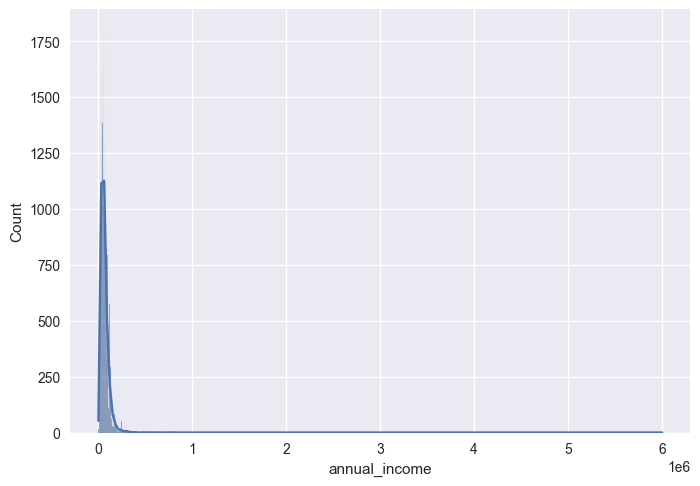

In [152]:
sns.histplot(df["annual_income"],kde=1)
plt.show()

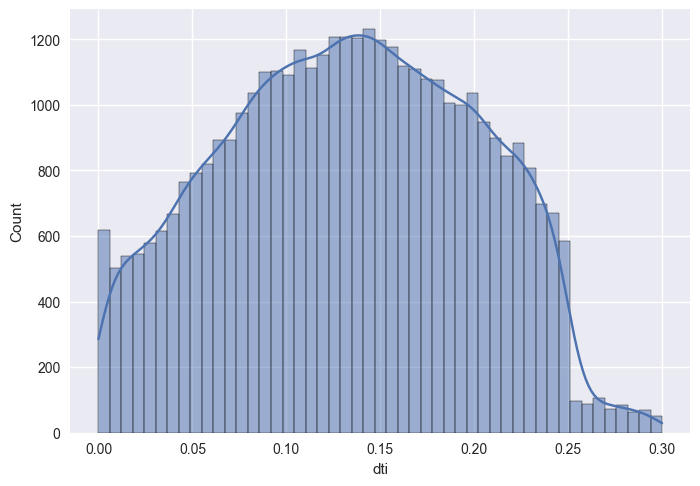

In [153]:
sns.histplot(df["dti"],kde=1)
plt.show()

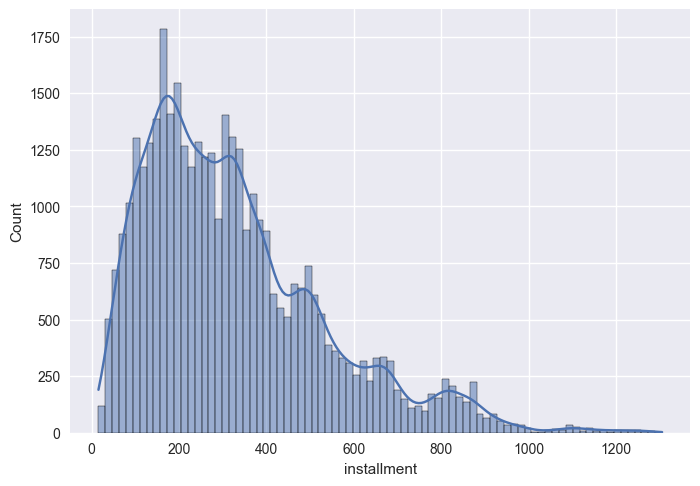

In [154]:
sns.histplot(df["installment"],kde=1)
plt.show()

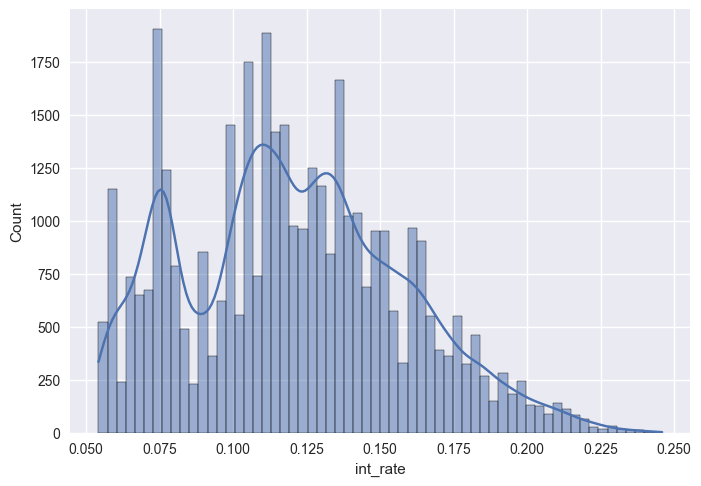

In [155]:
sns.histplot(df["int_rate"],kde=1)
plt.show()

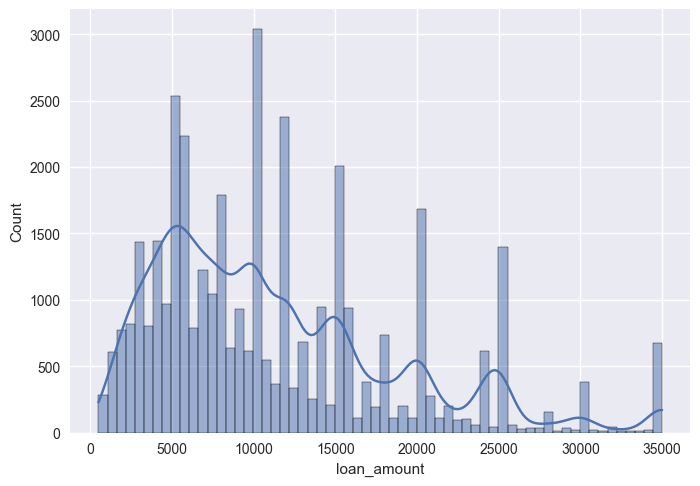

In [156]:
sns.histplot(df["loan_amount"],kde=1)
plt.show()

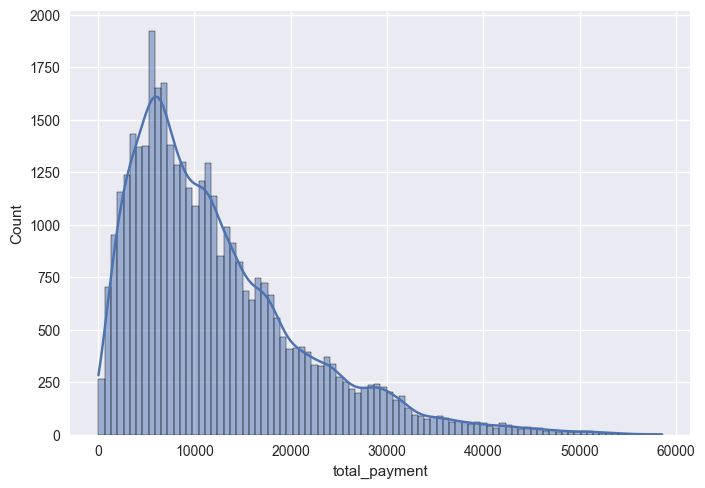

In [157]:
sns.histplot(df["total_payment"],kde=1)
plt.show()

# data preproccessing

## missing value

In [158]:
df.isnull().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [159]:
df.isnull().sum()/len(df)*100

id                      0.00
address_state           0.00
application_type        0.00
emp_length              0.00
emp_title               3.73
grade                   0.00
home_ownership          0.00
issue_date              0.00
last_credit_pull_date   0.00
last_payment_date       0.00
loan_status             0.00
next_payment_date       0.00
member_id               0.00
purpose                 0.00
sub_grade               0.00
term                    0.00
verification_status     0.00
annual_income           0.00
dti                     0.00
installment             0.00
int_rate                0.00
loan_amount             0.00
total_acc               0.00
total_payment           0.00
dtype: float64

In [160]:
df["emp_title"].fillna("unknown",inplace=True)

In [161]:
df.isnull().sum()

id                       0
address_state            0
application_type         0
emp_length               0
emp_title                0
grade                    0
home_ownership           0
issue_date               0
last_credit_pull_date    0
last_payment_date        0
loan_status              0
next_payment_date        0
member_id                0
purpose                  0
sub_grade                0
term                     0
verification_status      0
annual_income            0
dti                      0
installment              0
int_rate                 0
loan_amount              0
total_acc                0
total_payment            0
dtype: int64

## duplicate data

In [162]:
df.duplicated().sum()

np.int64(0)

# ANALYTICS

## Total Loan Applications 

In [163]:
df["id"].count()

np.int64(38576)

## Total Funded Amount

In [164]:
df["loan_amount"].sum()

np.int64(435757075)

## Total Amount Received

In [165]:
df["total_payment"].sum()

np.int64(473070933)

## Average Interest Rate

In [166]:
df["int_rate"].mean()

np.float64(0.12048831397760265)

## Average DTI Ratio

In [167]:
df["dti"].mean()

np.float64(0.13327433119037743)

## Month-to-Date (MTD) Funded Amount

## MTD Amount Received

In [168]:
# Convert to datetime
df['issue_date'] = pd.to_datetime(df['issue_date'], errors='coerce')
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'], errors='coerce')

# Get current month and year
today = datetime.today()
current_month = today.month
current_year = today.year

# Extract month & year for MTD
df['Funded_Month'] = df['issue_date'].dt.month
df['Funded_Year'] = df['issue_date'].dt.year
df['Received_Month'] = df['last_payment_date'].dt.month
df['Received_Year'] = df['last_payment_date'].dt.year

# MTD Filters
mtd_funded = df[(df['Funded_Month'] == current_month) & (df['Funded_Year'] == current_year)]
mtd_received = df[(df['Received_Month'] == current_month) & (df['Received_Year'] == current_year)]

# Summary by loan status
summary = df.groupby('loan_status').agg(
    Total_Loan_Applications=('id', 'count'),
    Total_Funded_Amount=('loan_amount', 'sum'),
    Total_Amount_Received=('total_payment', 'sum'),
    Average_Interest_Rate=('int_rate', 'mean'),
    Average_DTI_Ratio=('dti', 'mean')
)

# MTD summaries
mtd_funded_summary = mtd_funded.groupby('loan_status').agg(
    MTD_Funded_Amount=('loan_amount', 'sum')
)
mtd_received_summary = mtd_received.groupby('loan_status').agg(
    MTD_Amount_Received=('total_payment', 'sum')
)

# Combine all
report = summary.join(mtd_funded_summary, how='left').join(mtd_received_summary, how='left')
report = report.fillna(0)

# Show the result
pd.set_option('display.float_format', '{:,.2f}'.format)
print("Loan Performance Report by Loan Status:")
print(report)


Loan Performance Report by Loan Status:
             Total_Loan_Applications  Total_Funded_Amount  \
loan_status                                                 
Charged Off                     5333             65532225   
Current                         1098             18866500   
Fully Paid                     32145            351358350   

             Total_Amount_Received  Average_Interest_Rate  Average_DTI_Ratio  \
loan_status                                                                    
Charged Off               37284763                   0.14               0.14   
Current                   24199914                   0.15               0.15   
Fully Paid               411586256                   0.12               0.13   

             MTD_Funded_Amount  MTD_Amount_Received  
loan_status                                          
Charged Off               0.00                 0.00  
Current                   0.00                 0.00  
Fully Paid                0.00       

<Axes: xlabel='loan_status', ylabel='Total_Funded_Amount'>

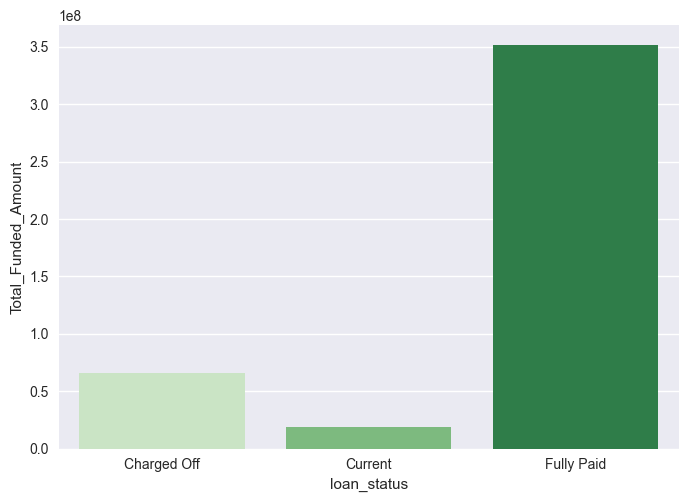

In [169]:
sns.barplot(x=report.index, y=report['Total_Funded_Amount'], palette='Greens')

<Axes: >

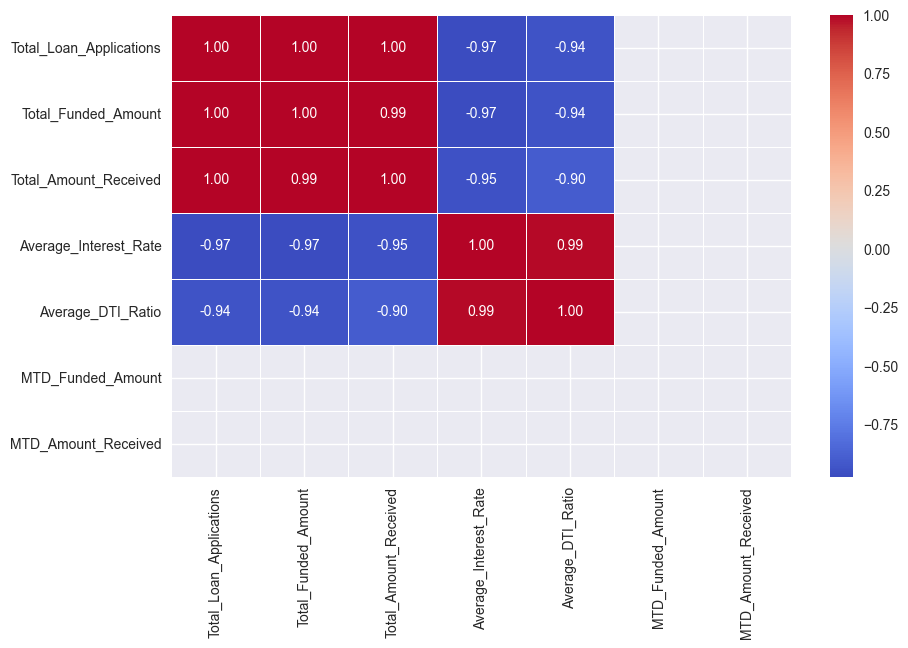

In [170]:
corr_matrix = report[['Total_Loan_Applications', 'Total_Funded_Amount', 'Total_Amount_Received', 'Average_Interest_Rate', 'Average_DTI_Ratio', 'MTD_Funded_Amount', 'MTD_Amount_Received']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)